<a href="https://colab.research.google.com/github/Maricielo-Gomez/Lenguajes-de-programacion/blob/main/TendenciaGoogle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISIS DE LA TENDENCIA DEL PRECIO DE LAS ACCIONES DE GOOGLE (GOOGL)**

## **1. Introducción**
- Planteamiento de la pregunta central:  
  **¿El precio de Google ha mostrado tendencia creciente en el tiempo?**


## **2. ¿Qué es un Ticker?**

Un **ticker** es el código que representa una empresa en la bolsa.  


El ticker de Google es:

---
| **Empresa / Índice**           | **Ticker** | **Descripción**                                   |
| ------------------------------ | ---------- | ------------------------------------------------- |
| Alphabet Inc. (Google)                     | `GOOGL`     | Matriz de Google                  |

---

## **3. Preparar el Entorno**

Antes de escribir código, vamos a **instalar las librerías necesarias**:
- `yfinance` → para traer datos de Yahoo Finance
- `pandas` → permite trabajar con DataFrames
- `matplotlib` → Para la visualización de datos en gráficos
- `numpy` → para cálculos numéricos y operaciones con array

In [ ]:
# Instalación de librerías
!pip install yfinance plotly

In [18]:
# Importación de librerías
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Librerías cargadas correctamente ✅")


Librerías cargadas correctamente ✅


---

## **4. Recolección de datos con yfinance**

Para analizar la tendencia del precio de Google, necesitamos extraer información histórica.  
La librería `yfinance` nos permite hacerlo de forma sencilla.

### **4.1. Creación del objeto**

Cuando usamos `yfinance`, creamos un objeto que contiene toda la información de esa empresa:

```python
google = yf.Ticker("GOOGL")



### **4.2. Funciones más útiles para el análisis:**

| Función / Método           | Para qué sirve                                 | Ejemplo |
|-----------------------------|-----------------------------------------------|---------|
| `yf.Ticker("GOOGL")`       | Crea un objeto con toda la información de Google | `google = yf.Ticker("GOOGL")` |
| `.history(period="5y")`    | Descarga precios históricos (ej. últimos 5 años) | `google.history(period="5y")` |
| `.info`                    | Información general de la empresa              | `google.info` |



💡 **Tip:** Para responder nuestra pregunta central (¿El precio de Google ha mostrado tendencia creciente?), el método más importante es .history(), porque nos devuelve los precios de cierre diarios


### 4.3. Extracción de datos históricos de Google

Con el objeto `google = yf.Ticker("GOOGL")` usamos el método `.history()` para obtener precios de apertura, cierre, máximos, mínimos y volumen.  
En este caso descargamos los precios de cierre de los últimos **5 años**, base para analizar la tendencia.


In [19]:
google = yf.Ticker("GOOGL")
data = round(google.history(period="5y")["Close"],2)
data.head()

,Close
Date,
2020-09-16 00:00:00-04:00,75.09
2020-09-17 00:00:00-04:00,73.84
2020-09-18 00:00:00-04:00,72.06
2020-09-21 00:00:00-04:00,71.02
2020-09-22 00:00:00-04:00,72.49


## **5. Análisis de la estabilidad y tendencia del precio de Google**

### **5.1. Cálculo de estadísticos básicos**

Se calcula la media y la desviación estándar del precio de cierre:

*   Media: promedio de los precios, referencia del nivel general
*   Desviación estándar: indica la dispersión de los precios, útil para medir volatilidad.


In [ ]:
media = data.mean()
desv = data.std()
print(f"Media del precio de cierre: {media:.2f} USD")
print(f"Desviación estándar: {desv:.2f} USD")

Media del precio de cierre: 133.97 USD
Desviación estándar: 32.87 USD


### **5.2. Evaluación de la volatilidad**

Conocer la volatilidad permite entender el riesgo y la estabilidad de la acción antes de tomar decisiones de inversión o analizar tendencias a largo plazo.

A partir de la desviación estándar se evalúa la volatilidad:

Desviación baja → la acción es estable, con cambios suaves en el precio.

Desviación alta → la acción es volátil, con subidas y bajadas pronunciadas.


In [ ]:
if desv < 10:
    print("La acción es estable")
else:
    print("La acción es volátil📈📉")


La acción es volátil📈📉


### **5.4. Visualización de la tendencia del precio de Google**
A continuación veremos cómo ha evolucionado el precio de cierre de Google a lo largo de los últimos 5 años.

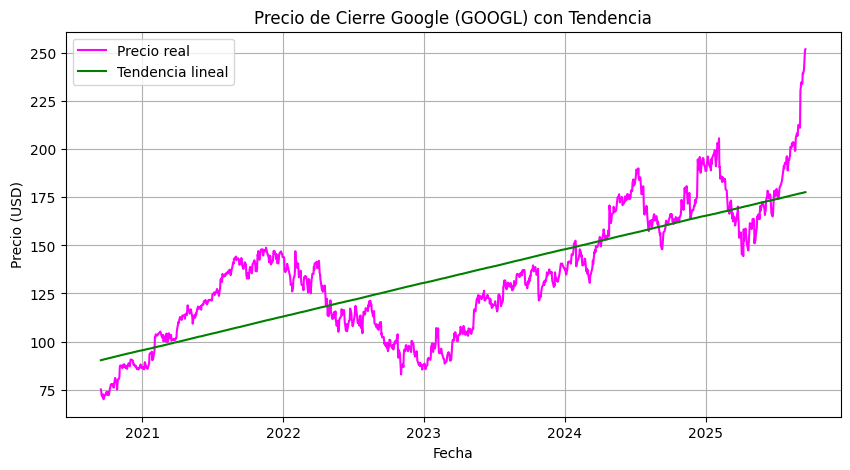

In [29]:
from sklearn.linear_model import LinearRegression

# Convertir a DataFrame y resetear índice
df = data.reset_index()  # 'Date' pasa a columna
df['Days'] = np.arange(len(df))  # número de días
X = df[['Days']]  # variable independiente
y = df['Close']   # variable dependiente

# Ajustar regresión lineal
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)  # predicciones de la tendencia

# Graficar precios reales y tendencia
plt.figure(figsize=(10,5))
plt.plot(df['Date'], y, label='Precio real', color='magenta')
plt.plot(df['Date'], y_pred, label='Tendencia lineal', color='green', linestyle='-')
plt.title("Precio de Cierre Google (GOOGL) con Tendencia")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.grid(True)
plt.legend()
plt.show()


#### **Cálculo de la pendiente**
 La pendiente indica cuánto cambia la variable dependiente, en este caso el precio por acción de Google, en el tiempo:

*   Si la pendiente es postiva, la relación es creciente.
*   Si es negativa, la relación es decreciente
*   Si es cercana a cero, no hay una tendencia clara.




In [37]:
slope = model.coef_[0]
print("Pendiente:", round(slope, 2))
if slope > 0:
    print("El precio de Google muestra una tendencia creciente.")
else:
    print("El precio de Google no muestra una tendencia creciente.")

Pendiente: 0.07
El precio de Google muestra una tendencia creciente.


#### **Análisis**

En el gráfico podemos ver dos líneas clave:
*   Precio real: Es una línea irregular que refleja la volatidad de la acción.
*   Tendencia lineal: Es una regresión lineal que suaviza las fluctuaciones y muestra la dirección general del precio en los últimos 5 años.

A la pregunta **¿El precio de Google ha mostrado tendencia creciente en el tiempo?** podemos afirmar que **sí**, ya que la pendiente de la línea de tendencia es positiva. Esto significa que, a pesar de la volatilidad del precio real de la acción de Google, esta ha seguido una trayectoria ascendente en el largo plazo.

